**Khái quát:**

- **torchvision.datasets.FashionMNIST()** : Load Fashion MNIST dataset
- **training_data[index]** : Return an image and label of it based on the index of sample in training_data
- **DataLoader(training_data, batchsize=[int], shuffle=[True])** : Load a batch sample form training_data which will be helpfull in training
- **torch.randint([start], [end], (1, ))** : Return a tensor contains one element of which value is between *start* and *end* values

Lưu ý:
Khi muốn tự tạo bộ dataset của mình, **class** *OurCustomDataset* phải có ít nhất 3 hàm \__init__, \__len__ và \__getitem__


In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import torchvision
import torch
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.io import read_image
from torchvision.transforms import ToTensor

## **Load dataset**

Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes

In [42]:
training_data = torchvision.datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = torchvision.datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

## **Iterating and visualize our dataset**

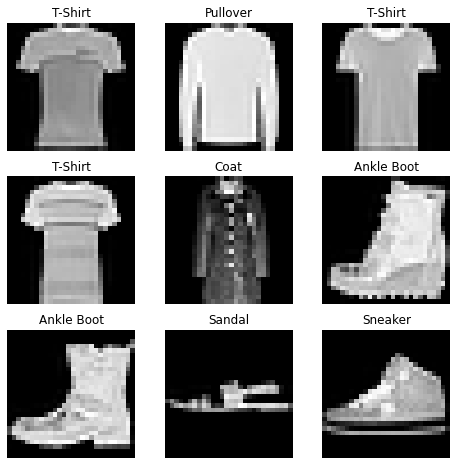

In [43]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size = (1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

## **Create our custom dataset**

A custom Dataset class must implement three functions: \__init__, \__len__, and \__getitem__. Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file

In [44]:
class Our_Custom_Dataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.img_labels = pd.read_csv(annotations_file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if (self.transform):
            image = self.transform(image)
        if (self.target_transform):
            label = self.target_transform(label)
        return image, label

## **Prepare our data for training with DataLoaders**

In [45]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Features batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


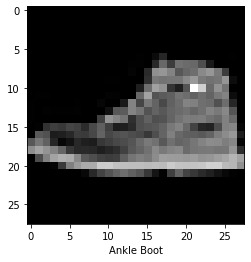

In [46]:
train_features, train_labels = next(iter(train_dataloader))
print("Features batch shape:", train_features.size())
print("Labels batch shape:", train_labels.size())
img, label = train_features[0].squeeze(), train_labels[0]
plt.imshow(img, cmap="gray")
plt.xlabel(labels_map[label.item()])
plt.show()